In [120]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

N: 108607, mean: -0.00001 us, rms: 13.492 us


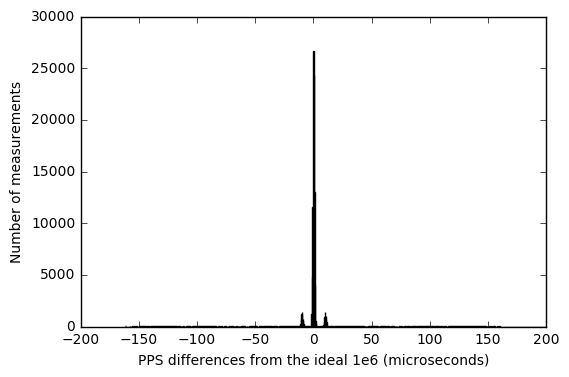

In [78]:
timestamps = []
with open('ppstest.txt') as ppstest:
    for line in ppstest:
        if line.startswith('source'):
            timestamps.append(float(line.split()[4].rstrip(',')))
            
diffs = np.diff(np.array(timestamps)) - 1.0
while (np.max(diffs) > 0.9): # fixing slipping problem with EXTINT measurements at 1Hz
    diffs[diffs > 0.9] -= 1.0  
us_diffs = diffs * 1e6
plt.hist(us_diffs, 1000)
plt.xlim([-200, 200])
plt.xlabel("PPS differences from the ideal 1e6 (microseconds)")
plt.ylabel("Number of measurements")
print('N: %d, mean: %.5f us, rms: %.3f us' % (us_diffs.size, us_diffs.mean(), us_diffs.std()))

N: 7005, mean: -0.01186 us, rms: 0.268 us


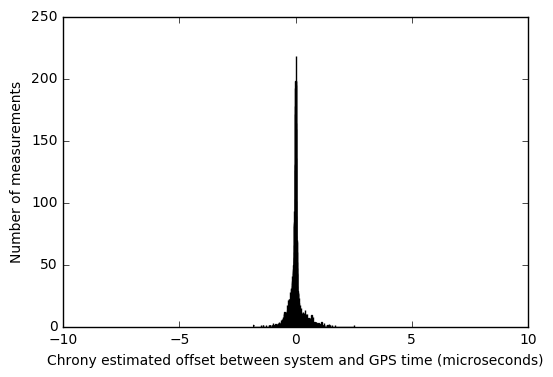

In [82]:
chrony_pps_offsets = []
with open('chrony-statistics.log') as stats:
    for line in stats:
        if ' PPS ' in line:
            chrony_pps_offsets.append(float(line.split()[4]))
            
offsets = np.array(chrony_pps_offsets)
us_offsets = offsets * 1e6
plt.hist(us_offsets, 1000)
plt.xlim([-10, 10])
plt.xlabel("Chrony estimated offset between system and GPS time (microseconds)")
plt.ylabel("Number of measurements")
print('N: %d, mean: %.5f us, rms: %.3f us' % (us_offsets.size, us_offsets.mean(), us_offsets.std()))

N: 5570, mean: 0.00019 us, rms: 0.135 us


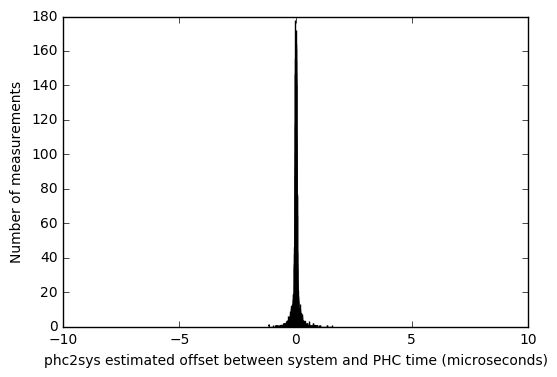

In [85]:
phc2sys_master_offsets = []
with open('phc2sys_master.log') as lines:
    for line in lines:
        phc2sys_master_offsets.append(float(line.split()[8]))

offsets = np.array(phc2sys_master_offsets)
us_offsets = offsets / 1e3
plt.hist(us_offsets, 1000)
plt.xlim([-10, 10])
plt.xlabel("phc2sys estimated offset between system and PHC time (microseconds)")
plt.ylabel("Number of measurements")
print('N: %d, mean: %.5f us, rms: %.3f us' % (us_offsets.size, us_offsets.mean(), us_offsets.std()))

N: 2804, mean: -0.00058 us, rms: 0.172 us


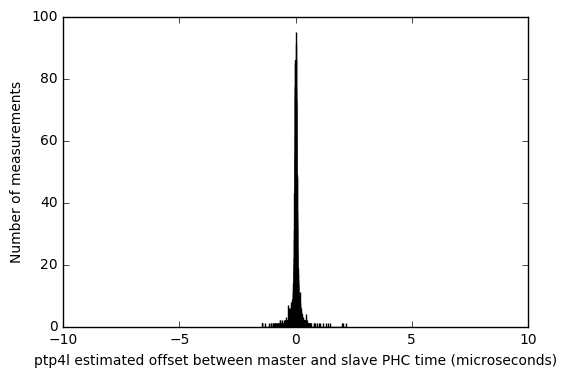

In [86]:
ptp4l_slave_offsets = []
with open('ptp4l_slave.log') as lines:
    for line in lines:
        ptp4l_slave_offsets.append(float(line.split()[8]))

offsets = np.array(ptp4l_slave_offsets)
us_offsets = offsets / 1e3
plt.hist(us_offsets, 1000)
plt.xlbim([-10, 10])
plt.xlabel("ptp4l estimated offset between master and slave PHC time (microseconds)")
plt.ylabel("Number of measurements")
print('N: %d, mean: %.5f us, rms: %.3f us' % (us_offsets.size, us_offsets.mean(), us_offsets.std()))

N: 9332, mean: -0.00002 us, rms: 0.054 us


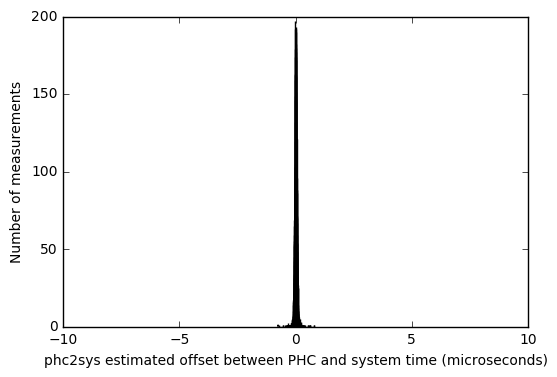

In [90]:
phc2sys_slave_offsets = []
with open('phc2sys_slave.log') as lines:
    for line in lines:
        phc2sys_slave_offsets.append(float(line.split()[8]))

offsets = np.array(phc2sys_slave_offsets)
us_offsets = offsets / 1e3
plt.hist(us_offsets, 1000)
plt.xlim([-10, 10])
plt.xlabel("phc2sys estimated offset between PHC and system time (microseconds)")
plt.ylabel("Number of measurements")
print('N: %d, mean: %.5f us, rms: %.3f us' % (us_offsets.size, us_offsets.mean(), us_offsets.std()))

N: 41373, mean: -0.25449 us, rms: 0.337 us
N: 82746, mean: 195.25740 us, rms: 0.387 us


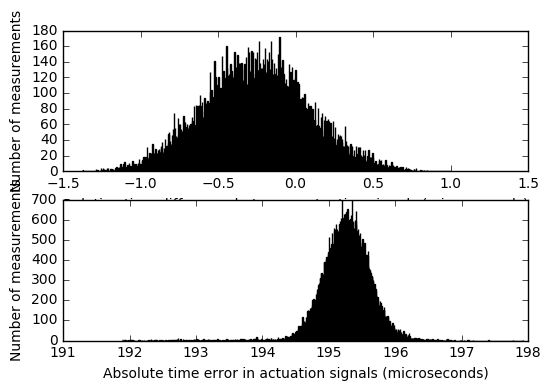

In [135]:
gpio_events = np.genfromtxt('integration_test.csv', delimiter=',', skip_header=1)

rel_offsets_us = 1e6 * np.diff(gpio_events, axis=1).flatten()
# median filter w/ length of 3 to get rid of single event jitters
rel_offsets_us = signal.medfilt(rel_offsets_us, kernel_size=3)

plt.subplot(2,1,1)
plt.hist(rel_offsets_us, 1000)
#plt.xlim([-10, 10])
plt.xlabel("Relative time difference between actuation signals (microseconds)")
plt.ylabel("Number of measurements")
print('N: %d, mean: %.5f us, rms: %.3f us' % (rel_offsets_us.size, rel_offsets_us.mean(), rel_offsets_us.std()))

abs_offsets_us = 1e6 * (np.modf(gpio_events.flatten())[0] - 0.5) # Note, we assume 500ms phase setting in pps_gen
# median filter w/ length of 3 to get rid of single event jitters
abs_offsets_us = signal.medfilt(abs_offsets_us, kernel_size=5)

plt.subplot(2,1,2)
plt.hist(abs_offsets_us, 1000)
#plt.xlim([-10, 10])
plt.xlabel("Absolute time error in actuation signals (microseconds)")
plt.ylabel("Number of measurements")
print('N: %d, mean: %.5f us, rms: %.3f us' % (abs_offsets_us.size, abs_offsets_us.mean(), abs_offsets_us.std()))
